# Capstone 3

## Modeling

Now that we've cleaned, wrangled, and pre-processed the data, it's time to create some models for our client. We want to determine which model works best for our client's needs. To that end, we've decided to focus on the recall of the models, as our client is more likely to tolerate false positives than false negatives of our target variable, "Prediabetic or Diabetic." Specifically, since we are most interested in which patients are "Prediabetic or Diabetic" instead of "Nondiabetic," VFH would be most tolerant of our models falsely classifying patients as "Prediabetic or Diabetic" when they are actually "Nondiabetic" than the reverse.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Resampling Techniques](#5.-Resampling-Techniques)

[6. Logistic Regression](#6.-Logistic-Regression)

[7. Random Forest](#7.-Random-Forest)

[8. XGBoost](#8.-XGBoost)

[9. Summary & Next Steps](#9.-Summary-&-Next-Steps)

[10. Hyperparameter Tuning](#10.-Hyperparameter-Tuning)

[11. Feature Importances](#11.-Feature-Importances)

## 2. Import Packages

In [9]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

## 3. Load Data

In [10]:
X_train = pd.read_csv('/Users/lauren/Desktop/Diabetes_X_train.csv', index_col=0)
X_test = pd.read_csv('/Users/lauren/Desktop/Diabetes_X_test.csv', index_col=0)
y_train = pd.read_csv('/Users/lauren/Desktop/Diabetes_y_train.csv', index_col=0)
y_test = pd.read_csv('/Users/lauren/Desktop/Diabetes_y_test.csv', index_col=0)

## 4. Explore the Data

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177576 entries, 78513 to 9224
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                177576 non-null  float64
 1   HighChol              177576 non-null  float64
 2   CholCheck             177576 non-null  float64
 3   BMI                   177576 non-null  float64
 4   Smoker                177576 non-null  float64
 5   Stroke                177576 non-null  float64
 6   HeartDiseaseorAttack  177576 non-null  float64
 7   PhysActivity          177576 non-null  float64
 8   Fruits                177576 non-null  float64
 9   Veggies               177576 non-null  float64
 10  HvyAlcoholConsump     177576 non-null  float64
 11  AnyHealthcare         177576 non-null  float64
 12  NoDocbcCost           177576 non-null  float64
 13  GenHlth               177576 non-null  float64
 14  MentHlth              177576 non-null  float64
 15

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76104 entries, 226430 to 88662
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                76104 non-null  float64
 1   HighChol              76104 non-null  float64
 2   CholCheck             76104 non-null  float64
 3   BMI                   76104 non-null  float64
 4   Smoker                76104 non-null  float64
 5   Stroke                76104 non-null  float64
 6   HeartDiseaseorAttack  76104 non-null  float64
 7   PhysActivity          76104 non-null  float64
 8   Fruits                76104 non-null  float64
 9   Veggies               76104 non-null  float64
 10  HvyAlcoholConsump     76104 non-null  float64
 11  AnyHealthcare         76104 non-null  float64
 12  NoDocbcCost           76104 non-null  float64
 13  GenHlth               76104 non-null  float64
 14  MentHlth              76104 non-null  float64
 15  PhysHlth      

In [13]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177576 entries, 78513 to 9224
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Diabetes_binary  177576 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


In [14]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76104 entries, 226430 to 88662
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  76104 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [15]:
y_train.value_counts()

Diabetes_binary
0.0                152834
1.0                 24742
dtype: int64

In [16]:
y_test.value_counts()

Diabetes_binary
0.0                65500
1.0                10604
dtype: int64

## 5. Resampling Techniques

There are two resampling techniquest that we will use: undersampling and oversampling.  First, we will look at undersampling:

### 5.1 Undersampling

In [17]:
counts_table = pd.DataFrame()

counts_table['technique'] = ['Original Data']
counts_table['X_train_shape'] = [X_train.shape[0]]
counts_table['y_train_shape'] = [y_train.shape[0]]
counts_table['Prediabetic or Diabetic'] = [y_train.value_counts()[1]]
counts_table['Nondiabetic'] = [y_train.value_counts()[0]]

counts_table

,technique,X_train_shape,y_train_shape,Prediabetic or Diabetic,Nondiabetic
0,Original Data,177576,177576,24742,152834


In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [19]:
new_row = {'technique':'Random Under Sampling', 
           'X_train_shape': X_train_rus.shape[0],
          'y_train_shape': y_train_rus.shape[0],
           'Prediabetic or Diabetic': y_train_rus.value_counts()[1],
          'Nondiabetic': y_train_rus.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Prediabetic or Diabetic,Nondiabetic
0,Original Data,177576,177576,24742,152834
1,Random Under Sampling,49484,49484,24742,24742


### 5.2 SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy = 'minority')

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [21]:
new_row = {'technique':'SMOTE - minority', 
           'X_train_shape': X_train_sm.shape[0],
          'y_train_shape': y_train_sm.shape[0],
           'Prediabetic or Diabetic': y_train_sm.value_counts()[1],
          'Nondiabetic': y_train_sm.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Prediabetic or Diabetic,Nondiabetic
0,Original Data,177576,177576,24742,152834
1,Random Under Sampling,49484,49484,24742,24742
2,SMOTE - minority,305668,305668,152834,152834


In [22]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()
X_train_rus_np = X_train_rus.to_numpy()
y_train_rus_np = y_train_rus.to_numpy().ravel()
X_train_sm_np = X_train_sm.to_numpy()
y_train_sm_np = y_train_sm.to_numpy().ravel()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().ravel()

In [23]:
print(X_train_np.shape, y_train_np.shape)
print(X_train_rus_np.shape, y_train_rus_np.shape)
print(X_train_sm_np.shape, y_train_sm_np.shape)

(177576, 21) (177576,)
(49484, 21) (49484,)
(305668, 21) (305668,)


## 6. Logistic Regression

### 6.1 Random Under Sampling

In [24]:
from sklearn.linear_model import LogisticRegression

lr_rus = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the training data.
lr_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_1a = lr_rus.predict(X_train_rus_np)
y_pred_test_1a = lr_rus.predict(X_test_np)

In [25]:
cm_1a_train = confusion_matrix(y_train_rus_np, y_pred_train_1a)
cm_1a_test = confusion_matrix(y_test_np, y_pred_test_1a)

Text(0.5, 1.0, 'LogisticRegression RUS - Testing confusion matrix')

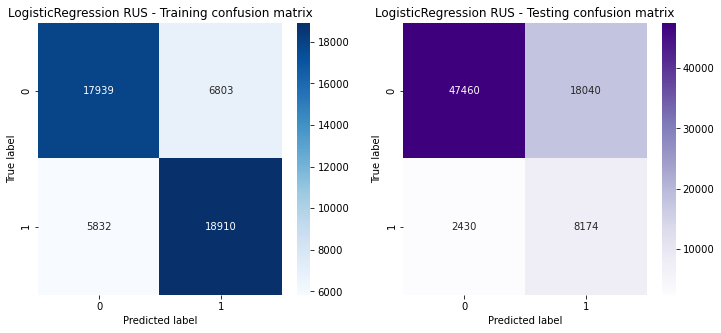

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression RUS - Training confusion matrix')

sns.heatmap(cm_1a_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression RUS - Testing confusion matrix')

In [27]:
from sklearn.metrics import classification_report

target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_1a = classification_report(y_test_np, y_pred_test_1a, target_names=target_names)
print(test_classification_report_1a)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.72      0.82     65500
Prediabetic or Diabetic       0.31      0.77      0.44     10604

               accuracy                           0.73     76104
              macro avg       0.63      0.75      0.63     76104
           weighted avg       0.86      0.73      0.77     76104



### 6.2 SMOTE

In [28]:
lr_sm = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the training data.
lr_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_1b = lr_sm.predict(X_train_sm_np)
y_pred_test_1b = lr_sm.predict(X_test_np)

In [29]:
cm_1b_train = confusion_matrix(y_train_sm_np,y_pred_train_1b)
cm_1b_test = confusion_matrix(y_test_np,y_pred_test_1b)

Text(0.5, 1.0, 'LogisticRegression SMOTE - Testing confusion matrix')

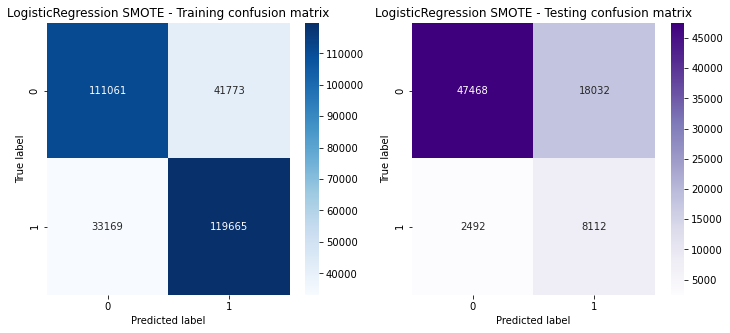

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression SMOTE - Training confusion matrix')

sns.heatmap(cm_1b_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression SMOTE - Testing confusion matrix')

In [31]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_1b = classification_report(y_test_np, y_pred_test_1b, target_names=target_names)
print(test_classification_report_1b)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.72      0.82     65500
Prediabetic or Diabetic       0.31      0.76      0.44     10604

               accuracy                           0.73     76104
              macro avg       0.63      0.74      0.63     76104
           weighted avg       0.86      0.73      0.77     76104



### 6.3 Balanced Weights of Classes

In [32]:
lr_balance = LogisticRegression(solver = 'saga', random_state = 42, class_weight = 'balanced')

# Fit the model on the training data.
lr_balance.fit(X_train_np, y_train_np)

y_pred_train_1c = lr_balance.predict(X_train_np)
y_pred_test_1c = lr_balance.predict(X_test_np)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
cm_1c_train = confusion_matrix(y_train_np,y_pred_train_1c)
cm_1c_test = confusion_matrix(y_test_np,y_pred_test_1c)

Text(0.5, 1.0, 'LogisticRegression class_weight - Testing confusion matrix')

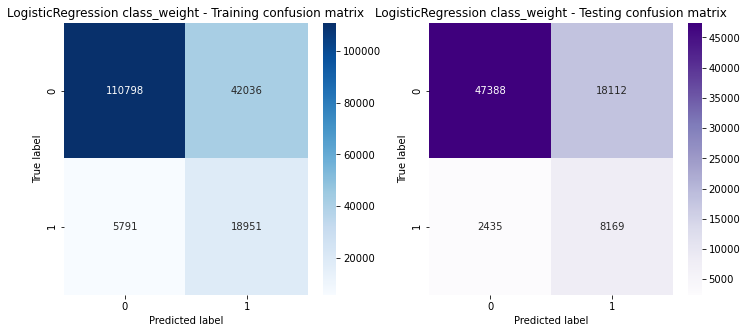

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1c_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression class_weight - Training confusion matrix')

sns.heatmap(cm_1c_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression class_weight - Testing confusion matrix')

In [35]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_1c = classification_report(y_test_np, y_pred_test_1c, target_names=target_names)
print(test_classification_report_1c)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.72      0.82     65500
Prediabetic or Diabetic       0.31      0.77      0.44     10604

               accuracy                           0.73     76104
              macro avg       0.63      0.75      0.63     76104
           weighted avg       0.86      0.73      0.77     76104



## 7. Random Forest

### 7.1 Random Under Sampling

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_2a = rf_rus.predict(X_train_rus_np)
y_pred_test_2a = rf_rus.predict(X_test_np)

In [37]:
cm_2a_train = confusion_matrix(y_train_rus_np,y_pred_train_2a)
cm_2a_test = confusion_matrix(y_test_np,y_pred_test_2a)

Text(0.5, 1.0, 'RandomForest RUS - Testing confusion matrix')

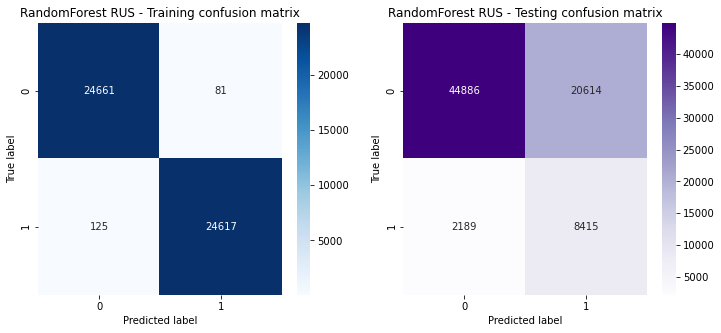

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest RUS - Training confusion matrix')

sns.heatmap(cm_2a_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest RUS - Testing confusion matrix')

In [39]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_2a = classification_report(y_test_np, y_pred_test_2a, target_names=target_names)
print(test_classification_report_2a)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.69      0.80     65500
Prediabetic or Diabetic       0.29      0.79      0.42     10604

               accuracy                           0.70     76104
              macro avg       0.62      0.74      0.61     76104
           weighted avg       0.86      0.70      0.75     76104



### 7.2 SMOTE

In [40]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_2b = rf_sm.predict(X_train_sm_np)
y_pred_test_2b = rf_sm.predict(X_test_np)

In [41]:
cm_2b_train = confusion_matrix(y_train_sm_np,y_pred_train_2b)
cm_2b_test = confusion_matrix(y_test_np,y_pred_test_2b)

Text(0.5, 1.0, 'RandomForest SMOTE - Testing confusion matrix')

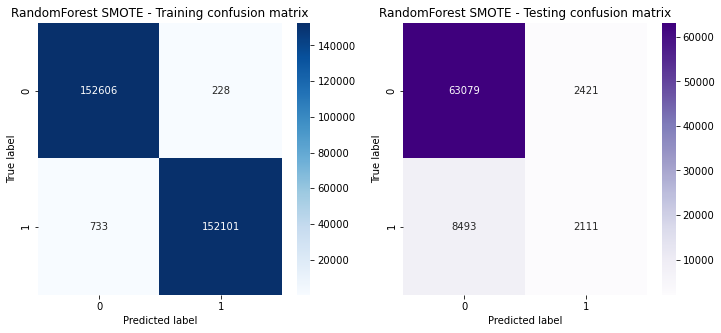

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest SMOTE - Training confusion matrix')

sns.heatmap(cm_2b_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest SMOTE - Testing confusion matrix')

In [43]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_2b = classification_report(y_test_np, y_pred_test_2b, target_names=target_names)
print(test_classification_report_2b)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.88      0.96      0.92     65500
Prediabetic or Diabetic       0.47      0.20      0.28     10604

               accuracy                           0.86     76104
              macro avg       0.67      0.58      0.60     76104
           weighted avg       0.82      0.86      0.83     76104



### 7.3 Balanced Weights of Classes

In [44]:
rf_balance = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balance.fit(X_train_np, y_train_np)

y_pred_train_2c = rf_balance.predict(X_train_np)
y_pred_test_2c = rf_balance.predict(X_test_np)

In [45]:
cm_2c_train = confusion_matrix(y_train_np,y_pred_train_2c)
cm_2c_test = confusion_matrix(y_test_np,y_pred_test_2c)

Text(0.5, 1.0, 'RandomForest class_weight balanced - Testing confusion matrix')

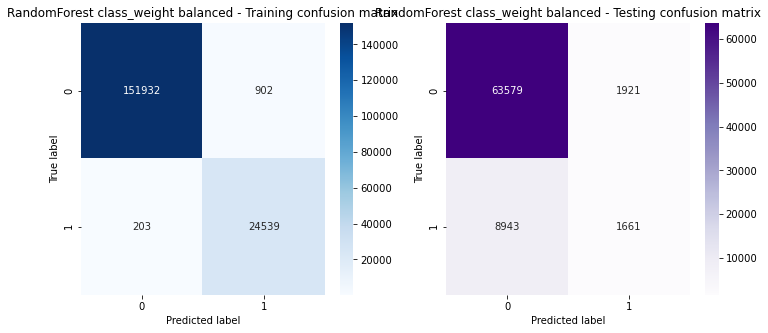

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2c_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest class_weight balanced - Training confusion matrix')

sns.heatmap(cm_2c_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest class_weight balanced - Testing confusion matrix')

In [47]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_2c, target_names=target_names))

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.88      0.97      0.92     65500
Prediabetic or Diabetic       0.46      0.16      0.23     10604

               accuracy                           0.86     76104
              macro avg       0.67      0.56      0.58     76104
           weighted avg       0.82      0.86      0.83     76104



## 8. XGBoost

### 8.1 Random Under Sampling

In [48]:
import xgboost as xgb

xg_rus = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, seed = 42)

xg_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_3a = xg_rus.predict(X_train_rus_np)
y_pred_test_3a = xg_rus.predict(X_test_np)

In [49]:
cm_3a_train = confusion_matrix(y_train_rus_np,y_pred_train_3a)
cm_3a_test = confusion_matrix(y_test_np,y_pred_test_3a)

Text(0.5, 1.0, 'XGBoost RUS - Testing confusion matrix')

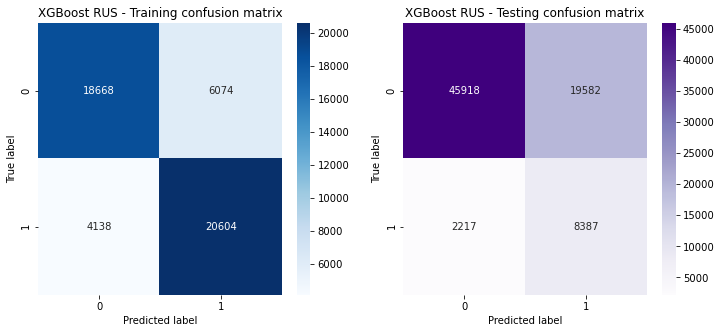

In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_3a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('XGBoost RUS - Training confusion matrix')

sns.heatmap(cm_3a_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('XGBoost RUS - Testing confusion matrix')

In [51]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_3a, target_names=target_names))

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.70      0.81     65500
Prediabetic or Diabetic       0.30      0.79      0.43     10604

               accuracy                           0.71     76104
              macro avg       0.63      0.75      0.62     76104
           weighted avg       0.86      0.71      0.76     76104



### 8.2 SMOTE

In [52]:
xg_sm = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, seed = 42)
xg_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_3b = xg_sm.predict(X_train_sm_np)
y_pred_test_3b = xg_sm.predict(X_test_np)

In [53]:
cm_3b_train = confusion_matrix(y_train_sm_np,y_pred_train_3b)
cm_3b_test = confusion_matrix(y_test_np,y_pred_test_3b)

Text(0.5, 1.0, 'XGBoost SMOTE - Testing confusion matrix')

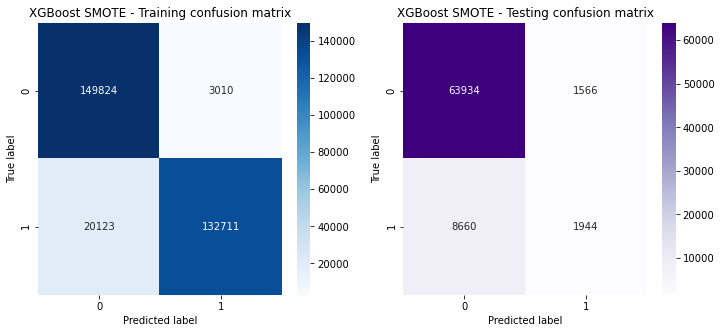

In [54]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_3b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('XGBoost SMOTE - Training confusion matrix')

sns.heatmap(cm_3b_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('XGBoost SMOTE - Testing confusion matrix')

In [55]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_3b, target_names=target_names))

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.88      0.98      0.93     65500
Prediabetic or Diabetic       0.55      0.18      0.28     10604

               accuracy                           0.87     76104
              macro avg       0.72      0.58      0.60     76104
           weighted avg       0.84      0.87      0.84     76104



### 8.3 Balanced Weights of Classes

In [56]:
uniqueValues, occurCount = np.unique(y_train_np, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0. 1.]
Occurrence Count :  [152834  24742]


In [57]:
weight = occurCount[0] / occurCount[1]
weight = round(weight)
print(weight)

6


In [58]:
xg_balance = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, scale_pos_weight = weight, seed = 42)
xg_balance.fit(X_train_np, y_train_np)

y_pred_train_3c = xg_balance.predict(X_train_np)
y_pred_test_3c = xg_balance.predict(X_test_np)

In [59]:
cm_3c_train = confusion_matrix(y_train_np,y_pred_train_3c)
cm_3c_test = confusion_matrix(y_test_np,y_pred_test_3c)

Text(0.5, 1.0, 'XGBoost SMOTE - Testing confusion matrix')

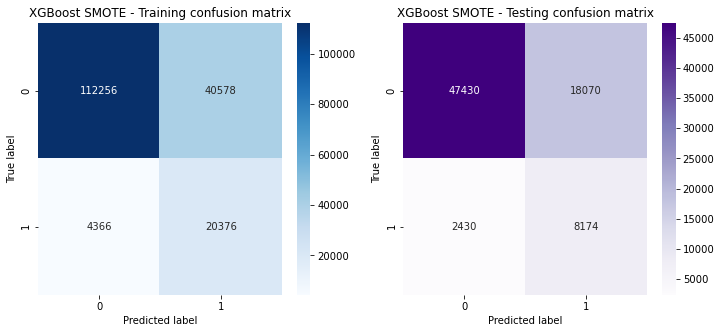

In [60]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_3c_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('XGBoost SMOTE - Training confusion matrix')

sns.heatmap(cm_3c_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('XGBoost SMOTE - Testing confusion matrix')

In [61]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_3c, target_names=target_names))

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.72      0.82     65500
Prediabetic or Diabetic       0.31      0.77      0.44     10604

               accuracy                           0.73     76104
              macro avg       0.63      0.75      0.63     76104
           weighted avg       0.86      0.73      0.77     76104



## 9. Summary & Next Steps

Let's create a table to help summarize the models that we created. This table summarizes the testing set results for each model. We are looking at the precision, recall, and f1-score for each model. As previously discussed, we are most interested in the recall:

In [62]:
from tabulate import tabulate

table = [['Logistic Regression - RUS','0.31','0.77','0.44'],['Logistic Regression - SMOTE','0.31','0.76','0.44'], ['Logistic Regression - Balanced Class','0.31','0.77','0.44'],['Random Forest - RUS','0.29','0.79','0.42'],['Random Forest - SMOTE','0.47','0.20','0.28'], ['Random Forest - Balanced Class', '0.46', '0.16', '0.23'], ['XGBoost - RUS', '0.30', '0.79', '0.43'], ['XGBoost - SMOTE', '0.55', '0.18', '0.28'], ['XGBoost - Balanced Class', '0.31', '0.77', '0.44']]

print(tabulate(table, headers=['Model','Test Precision','Test Recall','Test F1-Score'], tablefmt='presto'))

 Model                                |   Test Precision |   Test Recall |   Test F1-Score
--------------------------------------+------------------+---------------+-----------------
 Logistic Regression - RUS            |             0.31 |          0.77 |            0.44
 Logistic Regression - SMOTE          |             0.31 |          0.76 |            0.44
 Logistic Regression - Balanced Class |             0.31 |          0.77 |            0.44
 Random Forest - RUS                  |             0.29 |          0.79 |            0.42
 Random Forest - SMOTE                |             0.47 |          0.2  |            0.28
 Random Forest - Balanced Class       |             0.46 |          0.16 |            0.23
 XGBoost - RUS                        |             0.3  |          0.79 |            0.43
 XGBoost - SMOTE                      |             0.55 |          0.18 |            0.28
 XGBoost - Balanced Class             |             0.31 |          0.77 |            0.4

All in all, we've trained nine models.  Three logistic regression models, three random forest models, and three XGBoost models, using random under sampling, SMOTE, and a balanced class.

For the needs of our client, we've decided it would be ideal to optimize recall.  The top two models with respect to recall were the Random Forest using random under sampling and the XGBoost using random under sampling models.  

Now we'll apply hyperparameter tuning. 

## 10. Hyperparameter Tuning

### 10.1 Random Forest Model

The below code is adapted from the following: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

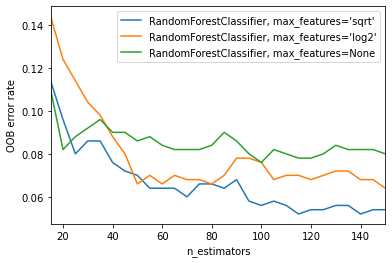

In [63]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# generate a binary classification dataset
X_train, y_train = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# note, setting the 'warm_start' construction parameter to 'True' disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features='sqrt',
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features='log2',
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state = RANDOM_STATE,
        ),
    ),
]

# map a classifier name to a list of (<n_estimators>, <error rate>) pairs
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# range of 'n_estimators' values to explore
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators = i)
        clf.fit(X_train, y_train)
        
        # record the OOB error for each 'n_estimators = i' setting
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# generate the "OOB error rate" vs. "n_estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()



The above plot shows how we can use the OOB ("Out of Bag") error rate to find the best values within the search space of n_estimators and max_features, and here we choose the values at which the smaller error curve seems to stabilize.

Per the above, it appears we should use n_estimators = 118 and max_features = sqrt

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_rus = RandomForestClassifier(n_estimators = 118, max_features = 'sqrt')
rf_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_2a = rf_rus.predict(X_train_rus_np)
y_pred_test_2a = rf_rus.predict(X_test_np)

In [65]:
cm_2a_train = confusion_matrix(y_train_rus_np,y_pred_train_2a)
cm_2a_test = confusion_matrix(y_test_np,y_pred_test_2a)

Text(0.5, 1.0, 'RandomForest RUS - Testing confusion matrix')

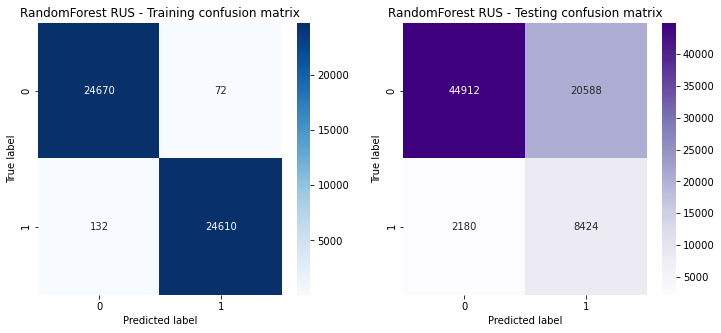

In [66]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest RUS - Training confusion matrix')

sns.heatmap(cm_2a_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest RUS - Testing confusion matrix')

In [67]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
test_classification_report_2a = classification_report(y_test_np, y_pred_test_2a, target_names=target_names)
print(test_classification_report_2a)

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.69      0.80     65500
Prediabetic or Diabetic       0.29      0.79      0.43     10604

               accuracy                           0.70     76104
              macro avg       0.62      0.74      0.61     76104
           weighted avg       0.86      0.70      0.75     76104



### 10.2 XGBoost Model

In [70]:
params = { 'max_depth': [3, 5, 6, 10, 15],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

xg_rus = xgb.XGBClassifier(use_label_encoder=False)
xg_rus_cv = RandomizedSearchCV(xg_rus, 
                         param_distributions = params,
                         cv = 3,  
                         n_iter = 20,  
                         scoring = 'f1', 
                         verbose = 2, 
                         n_jobs = 4)

xg_rus_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[15:36:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           v

In [73]:
xg_rus_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.7}

In [74]:
xg_rus = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, seed = 42, subsample = 0.7, n_estimators = 1000, max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.6, colsample_bylevel = 0.7)

xg_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_3a = xg_rus.predict(X_train_rus_np)
y_pred_test_3a = xg_rus.predict(X_test_np)

In [75]:
cm_3a_train = confusion_matrix(y_train_rus_np,y_pred_train_3a)
cm_3a_test = confusion_matrix(y_test_np,y_pred_test_3a)

Text(0.5, 1.0, 'XGBoost RUS - Testing confusion matrix')

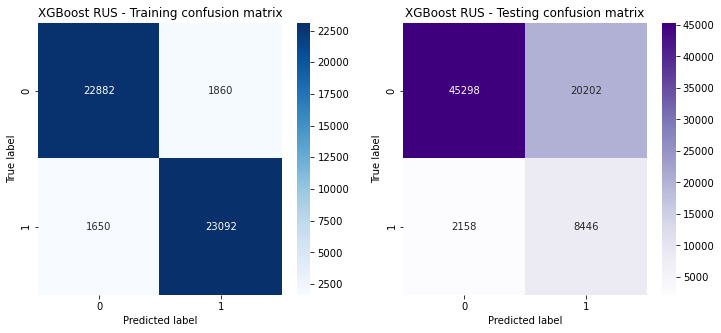

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_3a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('XGBoost RUS - Training confusion matrix')

sns.heatmap(cm_3a_test, annot=True, fmt = '', cmap = 'Purples',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('XGBoost RUS - Testing confusion matrix')

In [77]:
target_names = ['Nondiabetic', 'Prediabetic or Diabetic']

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_3a, target_names=target_names))

[Test Classification Report]
                         precision    recall  f1-score   support

            Nondiabetic       0.95      0.69      0.80     65500
Prediabetic or Diabetic       0.29      0.80      0.43     10604

               accuracy                           0.71     76104
              macro avg       0.62      0.74      0.62     76104
           weighted avg       0.86      0.71      0.75     76104



### 10.3 Summary

In [78]:
from tabulate import tabulate

table = [['Logistic Regression - RUS','0.31','0.77','0.44'],['Logistic Regression - SMOTE','0.31','0.76','0.44'], ['Logistic Regression - Balanced Class','0.31','0.77','0.44'],['Random Forest - RUS','0.29','0.79','0.43'],['Random Forest - SMOTE','0.47','0.20','0.28'], ['Random Forest - Balanced Class', '0.46', '0.16', '0.23'], ['XGBoost - RUS', '0.29', '0.80', '0.43'], ['XGBoost - SMOTE', '0.55', '0.18', '0.28'], ['XGBoost - Balanced Class', '0.31', '0.77', '0.44']]

print(tabulate(table, headers=['Model','Test Precision','Test Recall','Test F1-Score'], tablefmt='presto'))

 Model                                |   Test Precision |   Test Recall |   Test F1-Score
--------------------------------------+------------------+---------------+-----------------
 Logistic Regression - RUS            |             0.31 |          0.77 |            0.44
 Logistic Regression - SMOTE          |             0.31 |          0.76 |            0.44
 Logistic Regression - Balanced Class |             0.31 |          0.77 |            0.44
 Random Forest - RUS                  |             0.29 |          0.79 |            0.43
 Random Forest - SMOTE                |             0.47 |          0.2  |            0.28
 Random Forest - Balanced Class       |             0.46 |          0.16 |            0.23
 XGBoost - RUS                        |             0.29 |          0.8  |            0.43
 XGBoost - SMOTE                      |             0.55 |          0.18 |            0.28
 XGBoost - Balanced Class             |             0.31 |          0.77 |            0.4

With the hyperparameter tuning, we can see that there was not much of a change in the classification reports for either model.  However, the hyperparameter tuning did improve the XGBoost model using the random under sampling.  It has a recall of 0.80.  As a result, we have decided that this model best fits the needs of our client.

## 11. Feature Importances

[Text(0, 0, 'HighBP'),
 Text(0, 1, 'HighChol'),
 Text(0, 2, 'CholCheck'),
 Text(0, 3, 'BMI'),
 Text(0, 4, 'Smoker'),
 Text(0, 5, 'Stroke'),
 Text(0, 6, 'HeartDiseaseorAttack'),
 Text(0, 7, 'PhysActivity'),
 Text(0, 8, 'Fruits'),
 Text(0, 9, 'Veggies'),
 Text(0, 10, 'HvyAlcoholConsump'),
 Text(0, 11, 'AnyHealthcare'),
 Text(0, 12, 'NoDocbcCost'),
 Text(0, 13, 'GenHlth'),
 Text(0, 14, 'MentHlth'),
 Text(0, 15, 'PhysHlth'),
 Text(0, 16, 'DiffWalk'),
 Text(0, 17, 'Sex'),
 Text(0, 18, 'Age'),
 Text(0, 19, 'Education'),
 Text(0, 20, 'Income')]

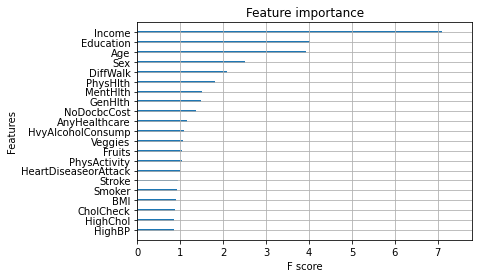

In [93]:

plot_importance(xg_rus, show_values=False, importance_type='gain').set_yticklabels(['HighBP','HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'])

Based on the above graph, we can see that the five most importance features for the XGBoost model (in descending order) include:

* Income
* Education
* Age
* Sex
* DiffWalk